<a href="https://colab.research.google.com/github/v41bh4v/Qiskit_step_by_step/blob/master/Superdense_coding_protocol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit

     |████████████████████████████████| 6.7MB 3.9MB/s 
     |████████████████████████████████| 23.3MB 1.2MB/s 
     |████████████████████████████████| 163kB 47.0MB/s 
     |████████████████████████████████| 184kB 50.3MB/s 
     |████████████████████████████████| 1.9MB 39.5MB/s 
     |████████████████████████████████| 768kB 46.5MB/s 
     |████████████████████████████████| 5.8MB 45.5MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 296kB 43.7MB/s 
     |████████████████████████████████| 71kB 9.1MB/s 
     |████████████████████████████████| 26.0MB 1.3MB/s 
     |████████████████████████████████| 573kB 46.8MB/s 
     |████████████████████████████████| 2.7MB 45.3MB/s 
  Created wheel for qiskit: filename=qiskit-0.19.6-cp36-none-any.whl size=3019 sha256=0583b7973a3a213c48a637421ff8154597fa5aa4c8578810a93e6eaaa7a7c502
  Stored in directory: /root/.cache/pip/wheels/35/45/55/8b82d355edf738eb

input one of the below message: 
 1. 00 
 2. 01 
3. 10 
4. 11 
11


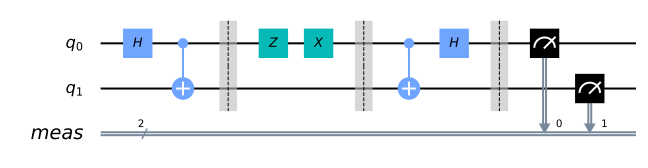

In [2]:
from qiskit import *
from qiskit.visualization import plot_histogram
# For Jupyter Notebooks, change the settings to get nicer images
%config InlineBackend.figure_format = 'svg'

# Define a function that takes a QuantumCircuit (qc) 
# and two integers (a & b)
def create_bell_pair(qc, a, b):
    qc.h(a) # Apply a h-gate to the first qubit
    qc.cx(a,b) # Apply a CNOT, using the first qubit as the control

#Encoding our msg
# Define a function that takes a QuantumCircuit (qc)
# a qubit index (qubit) and a message string (msg)
def encode_message(qc, qubit, msg):
    if msg == "00":
        pass    # To send 00 we do nothing
    elif msg == "10":
        qc.x(qubit) # To send 10 we apply an X-gate
    elif msg == "01":
        qc.z(qubit) # To send 01 we apply a Z-gate
    elif msg == "11":
        qc.z(qubit) # To send 11, we apply a Z-gate
        qc.x(qubit) # followed by an X-gate
    else:
        print("Invalid Message: Sending '00'")

#Decoding our msg
def decode_message(qc,a,b):
  qc.cx(a,b)
  qc.h(a)

#create circuit
qc = QuantumCircuit(2)

# create entangled pair
create_bell_pair(qc,0,1)
qc.barrier()

message = input("input one of the below message: \n 1. 00 \n 2. 01 \n3. 10 \n4. 11 \n") 
encode_message(qc, 0, message)
qc.barrier()
# Alice then sends her qubit to Bob.

# After recieving qubit 0, Bob applies the recovery protocol:
decode_message(qc, 0, 1)

# Finally, Bob measures his qubits to read Alice's message
qc.measure_all()

# Draw our output
qc.draw(output = "mpl")




{'11': 1024}


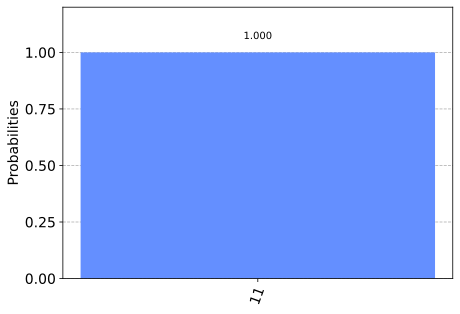

In [3]:
#Visualizing
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

configrc.store_credentials:WARNING:2020-07-08 19:39:23,954: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2020-07-08 19:39:24,252: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_london
Job Status: job has successfully run


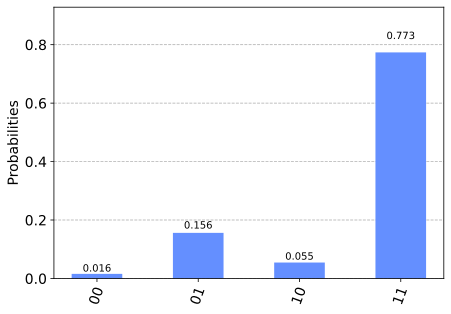

In [9]:
# Doing it on real Quantum computer
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 4096

IBMQ.save_account('6540e36d3f9476d104af16f52ef0ca6eb678b9936b7e43c48570ac609a034a052e86ddf374a7ee046d4f108244b3a71916c057585b15bcd3923f8560c6a24a13')
# Load local account information
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
# Run our circuit
job = execute(qc, backend=backend, shots=shots)

# Monitoring our job
from qiskit.tools.monitor import job_monitor
job_monitor(job)

# Plotting our result
result = job.result()
plot_histogram(result.get_counts(qc))




In [7]:
correct_results = result.get_counts(qc)[message]
accuracy = (correct_results/shots)*100
print("Accuracy = %.2f%%" % accuracy)


Accuracy = 77.73%
